# Introduction

Python is one of the best known programming languages. It has also gained both credence and fame in GIS for enabling conducting simple and complex GIS applications. More than that, programming in GIS is fun. And sometimes the harder it gets, the more impetus you have in coding more until you get to the solution.

For today, being still a fresh entry into the new year, we shall start simple. No more than showing how to plot points, distance between two points and overlaying them on a new map. The only twist is that we shall do so in jupyter.

Go to jupyter and create a new python notebook. 


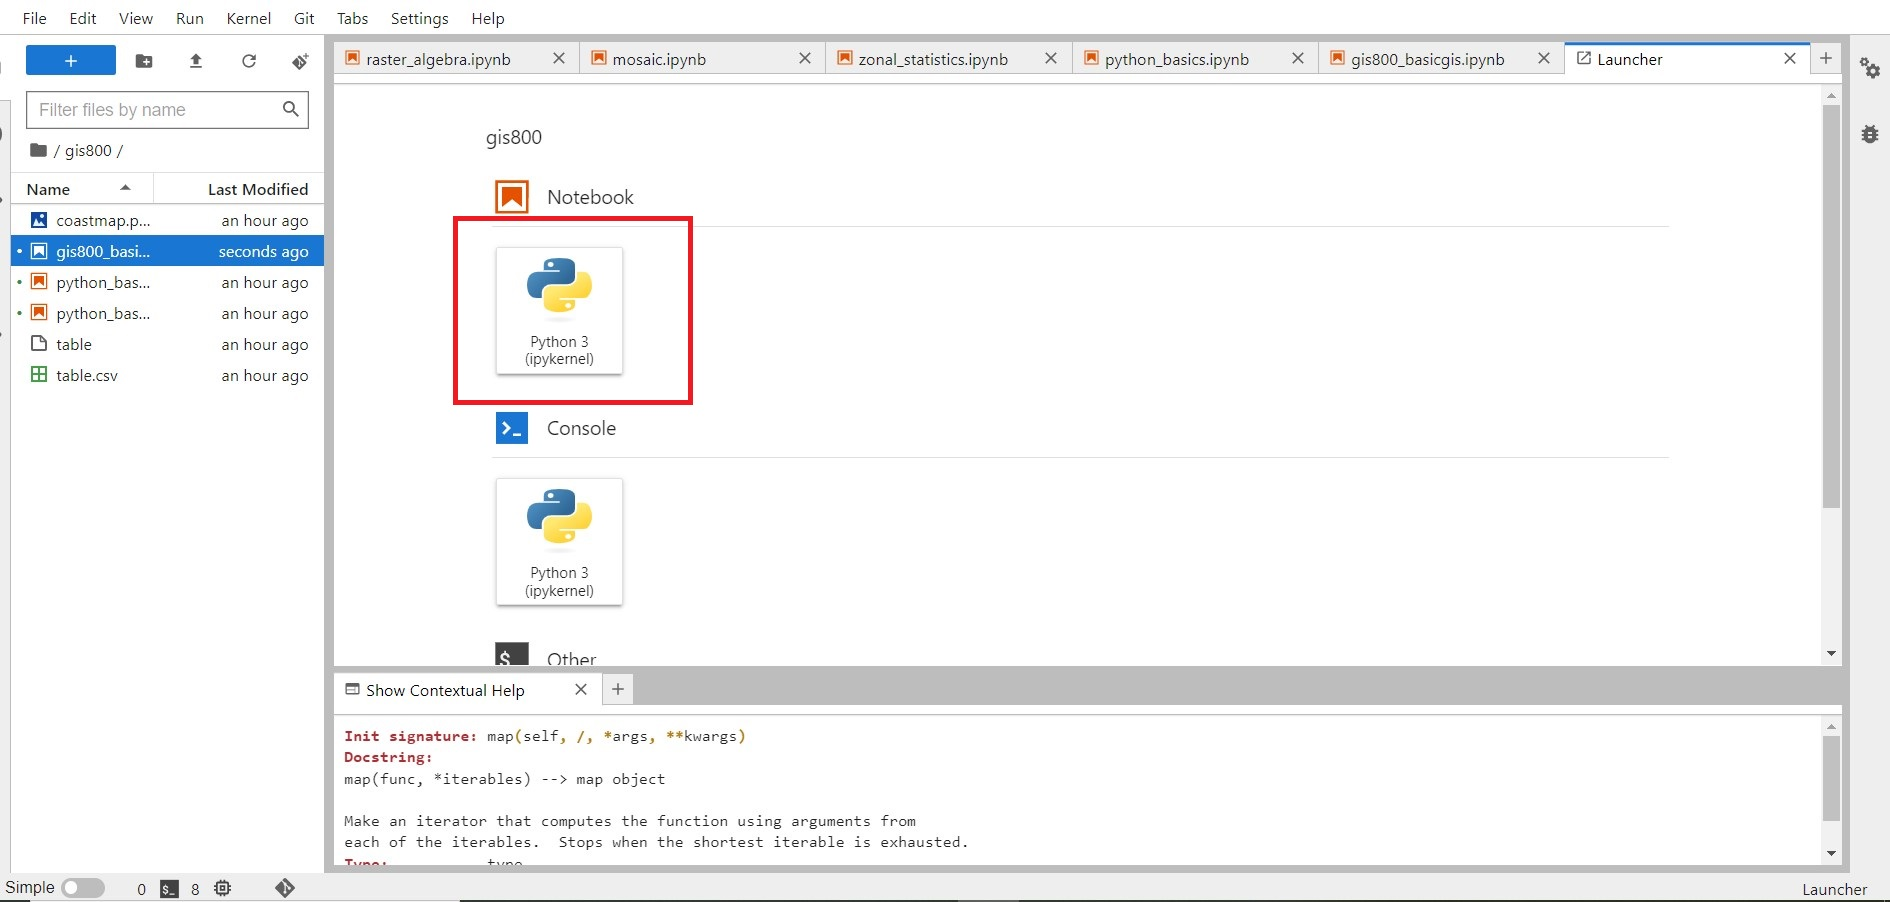

In [1]:
from IPython import display
display.Image("E:/documents/gis800_articles/jupyter/simple_gis/jupyter.jpg", alt="Launching Jupyter Notebook")

Once launched, you will have an empty interface similar to the one that looks like the one below. 

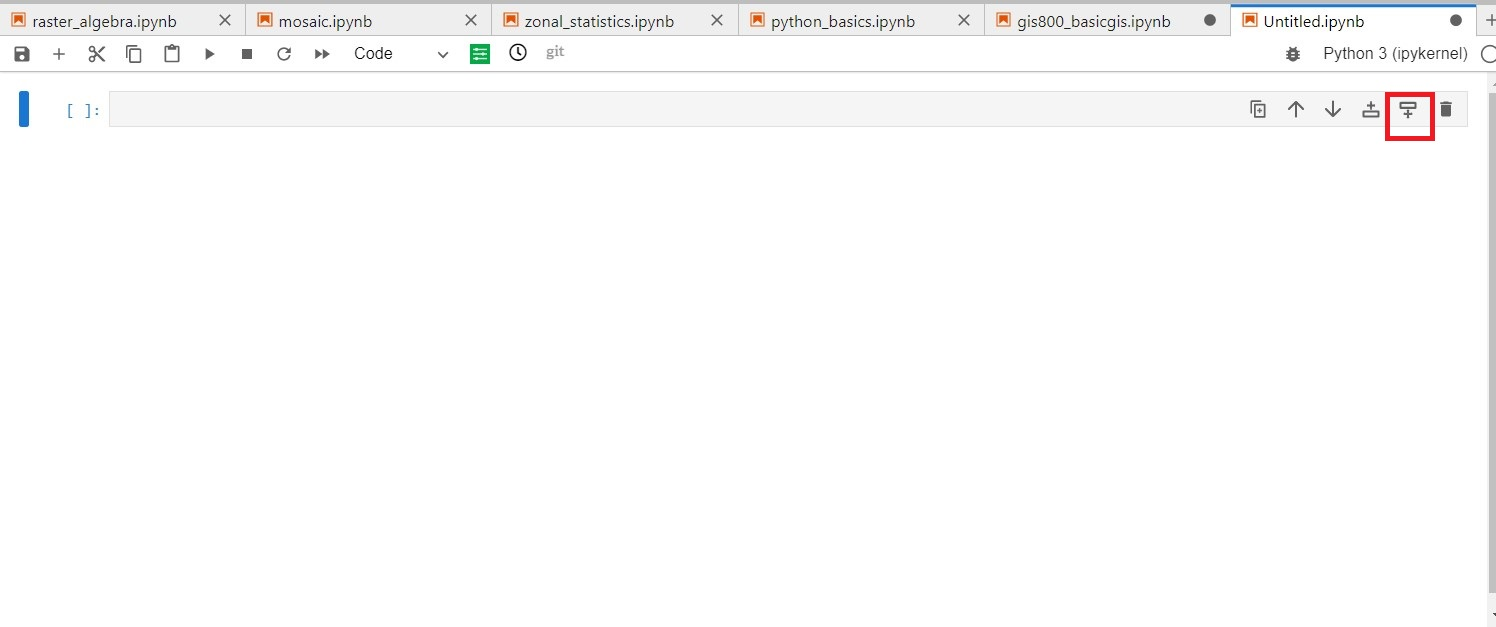

In [2]:
display.Image("E:/documents/gis800_articles/jupyter/simple_gis/interface.jpg", alt="Notebook Interface")

You can add more cells using one of the drop icons shown by a red rectangle in the image above. Having created a substantial number of cells as a playground for your coding practice, it's time to start coding! 

Let's begin the honors. We shall first import the necessary packages to enable our spatial operations in Python much the same way we do in R. 
But not so fast!

Just like in R where you download the packages for a particular task using the open sesame keyword `install.packages("package-name")`, the process is also similar in Jupyter. The manner is albeit different/dissimilar. Before the packages are called into the notebook interface, you have to load them into your working environment in Jupyter. Think of an [environment](https://www.geeksforgeeks.org/python-virtual-environment/) as a warehouse where all the tools and dependencies of your project are separated from other warehouses. That is, the tools and dependencies are not shared by other warehouses which could be of the same, or different projects. An envornment is just to keep your work 'safe' and free from 'influence' from other projects.

So, in order to load a new package that will be called into your Jupyter notebook interface, take one step back to your Anaconda command prompt. If you are a beginner and are wondering ever since when Jupiter could fit into a notebook, this is how the Anaconda command prompt looks like:


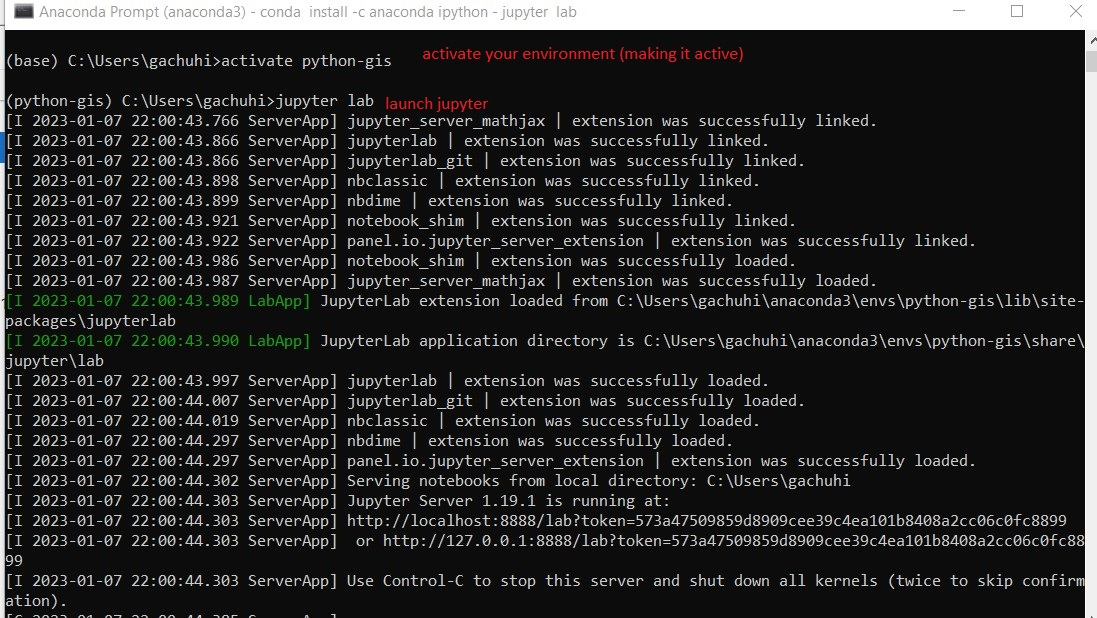

In [3]:
display.Image("E:/documents/gis800_articles/jupyter/simple_gis/cmd.jpg", alt="The Anaconda Command Prompt (cmd)")

Having cleared the mist on that earlier bit, let's see how one can install a package into anaconda, which can then be loaded into Jupyter. Anaconda is the all-rounded packages that comes with jupyter. Enough of talk. Let's give an example of installing a package into anaconda and subsequently loading it into a notebook. 

Packages are installed into your anaconda environment in the following format:
```python
conda install -c anaconda <package name>
```

As an example, here we show how to install the package `ipython` which was crucial in seeing the images that you take for granted in this article.

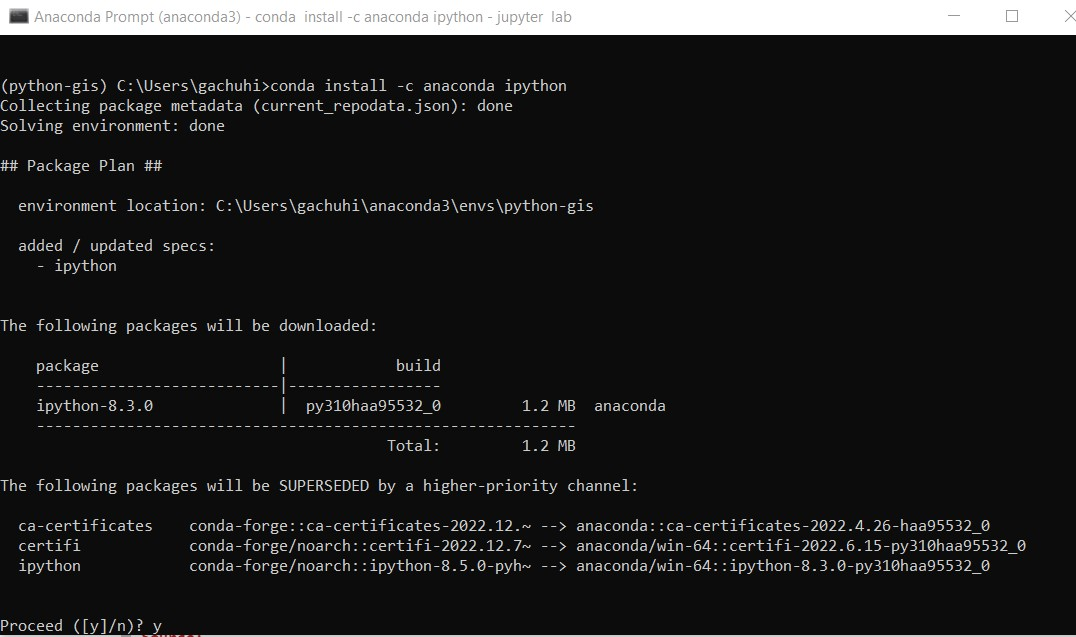

In [4]:
display.Image("E:/documents/gis800_articles/jupyter/simple_gis/installing.jpg", alt="Installing a package into Anaconda")

Just follow the prompts if you want to have your package installed, including answering "y" as "Yes" in the last question. To know that your package was installed successfully, you get the following statements in the cmd:

```
Downloading and Extracting Packages

Preparing transaction: done
Verifying transaction: done
Executing transaction: done
```

You can rest easy knowing that your packages have been successfully installed.

We've spend enough time in the dark world of cmd. Let's get back to the notebook interface. It's about time we started doing some programming. Remember when after installing a package in R (because my background in programming first started with R), we would load the package into the R script using the protocol `library(package name)`? Well, guess what, Python has a not too dissimar format. 

Here are the first packages we shall import:

In [5]:
# import necessary packages
import numpy as np
from shapely.geometry import Point

We want to draw the point coordinates of a place, some interesting place, say the Vasco Da Gama pillar. We know the coordinates of the place are Lat-Lon (40.1276701, -3.2236304). In Python, point coordinates are drawn using the function `Point()`.

In [6]:
# draw a coordinate of a place - Vasco Da Gama Pillar
vasco = Point(40.1276701, -3.2236304)

Let's plot the above point that we've created.

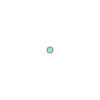

In [7]:
# Show the vasco da Gama point 
vasco

Our first success of drawing a point in Python. But just because it's a point from coordinates does not make a *geometry* object. Our point object does not have a [`geometry` column](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe), which is crucial for spatial operations due to its location component inherent in it. But we shall get there in a bit

We would like to convert our point object into a geo-dataframe. Why? Isn't it already good the way it is? No. If you would like to have your point object attributes, and they can be many, sometimes in their thousands, then you need to convert it from just a simple list, to a geodataframe. This will enable assigning the points to a particular Coordinate Reference System (CRS) and perform other spatial operations on it. Some of these operations are impossible if it just remains the way it is.


We shall do the conversion in two simple steps. Convert the points object to a dataframe, and thereafter to a geodataframe.

In [8]:
# import the necessary packages
import pandas as pd  # imports pandas package which has numerous tools for dataframe manipulation
import geopandas as gpd # works like pandas, but suited for dataframes with geometry column aka spatial dataframes

Now let's transform our points object of `vasco` into a dataframe first.

In [9]:
# Transform vasco point coordinates to a dataframe
vasco = pd.DataFrame({'Longitude': [40.1276701], 
                    'Latitude': [-3.2236304]})

Now let's finish the remaining part of the puzzle by converting the data frame into a geo dataframe.

In [10]:
# Convert the dataframe of vasco point to geoDataFrame
vasco_gpd = gpd.GeoDataFrame(vasco, 
                         geometry=gpd.points_from_xy(vasco.Longitude, vasco.Latitude), 
                         crs="EPSG:4326")

Are you curious to see how the geo dataframe is different from the normal dataframe? You can easily find this out by using the method `head()` which shows the first few rows of a dataframe. A *geo* dataframe is simply a dataframe with an added spatial component, the *geometry* column.

In [11]:
# Lets view the contents of vasco geodataframe
vasco_gpd.head()

Longitude  Latitude                   geometry
0   40.12767  -3.22363  POINT (40.12767 -3.22363)

Nailed it! Let's plot it.

<AxesSubplot: >

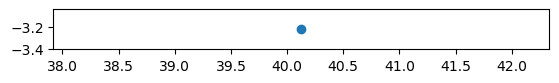

In [12]:
vasco_gpd.plot()

Just a one small point with little surrounding features to help us understand where it is exactly. Since we had earlier mentioned we want to measure the distance between two points, we shall add another point geometry of an interesting place-- the Gedi Ruins. The point coordinates for our newest kid on the block are Lat-Lon (39.9623916, -3.334307).

Let's add it.

In [13]:
# Let's add the coordinates for Gedi ruins to those of Vasco
gedi = pd.DataFrame({'Longitude': [39.9623916], 
                     'Latitude': [-3.334307]})

coast_points = vasco.append(gedi)  # Appending the points of Gedi to the first geodataframe of vasco

C:\Users\gachuhi\AppData\Local\Temp\ipykernel_20604\1267294226.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coast_points = vasco.append(gedi)  # Appending the points of Gedi to the first geodataframe of vasco


Let's see how our geodataframe is faring out after adding an additional point geometry.

In [14]:
# Show coast_points attributes
coast_points.head()

Longitude  Latitude                   geometry
0  40.127670 -3.223630  POINT (40.12767 -3.22363)
0  39.962392 -3.334307                       None

Something's amiss but it still makes sense. Our `gedi` object was not a *geodataframe* when appending to the spatially referenced `vasco` object but was still a dataframe. That is why the geometry column of the Gedi object reads `None`. No need to worry. It shall be fixed in no time.

In [15]:
# Convert the coast_points dataframe to GeoDataframe
coast_points_gpd = gpd.GeoDataFrame(coast_points, 
                                   geometry=gpd.points_from_xy(coast_points.Longitude, coast_points.Latitude), 
                                   crs="EPSG:4326")

coast_points_gpd.head()

Longitude  Latitude                   geometry
0  40.127670 -3.223630  POINT (40.12767 -3.22363)
0  39.962392 -3.334307  POINT (39.96239 -3.33431)

You are itching to plot the two points on a map, the true temperance of a cartographer but hold on. Our Points don't have names, and thus anyone can easily confuse which is Vasco or Gedi after a long list of coding mumbo jambo. Let's put in some names to reference each of our point object's coordinates.


In [16]:
# Add names of the places to the points
coast_points_gpd.insert(loc=0, 
                        column='Names',
                        value=['Vasco da Gama Pillar', 'Gedi Ruins']
                       )
coast_points_gpd.head()

Names  Longitude  Latitude                   geometry
0  Vasco da Gama Pillar  40.127670 -3.223630  POINT (40.12767 -3.22363)
0            Gedi Ruins  39.962392 -3.334307  POINT (39.96239 -3.33431)

Still an issue though. Our indexing is not correct. There is a high likelihood that when adding the Gedi object, which was an object variable of a single row of index[0], this property was carried to the geodataframe as well and was not auto-incremented. Thus the two zeroes.


Let's sort this out using the `reset_index()` function. A small tip before you move on. Jupyter also shows the help content for each function. See this [documentation](https://towardsdatascience.com/15-tips-and-tricks-for-jupyter-notebook-that-will-ease-your-coding-experience-e469207ac95c) for more details. 

In [17]:
# Arrange indexing
coast_points_gpd.reset_index(inplace=True)
coast_points_gpd.head()

index                 Names  Longitude  Latitude                   geometry
0      0  Vasco da Gama Pillar  40.127670 -3.223630  POINT (40.12767 -3.22363)
1      0            Gedi Ruins  39.962392 -3.334307  POINT (39.96239 -3.33431)

The cartographer patience has now run out. We know you want to plot the points on a map. But we must confess. Plotting maps in Python can *sometimes* be more labourious than in R. Let's first start the easy way.

<AxesSubplot: >

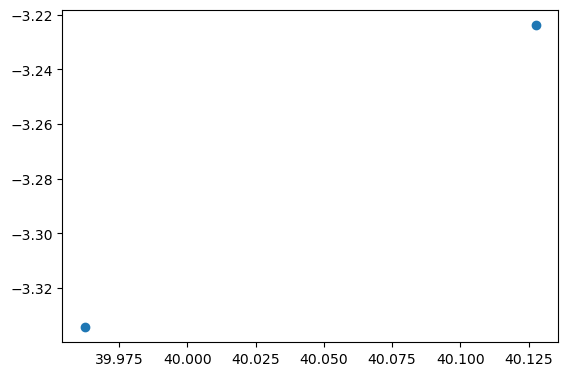

In [18]:
# Plot Distance Between Vasco da Gama and Gedi Ruins
coast_points_gpd.plot()

Easy enough. Let's do the sophisticated albeit the sorrowful way. It feels drawing on paper is much sweeter if not easier.

In [19]:
# Call the matplotlib package used to plot scatterplots, bargraphs, and among many others, maps
import matplotlib.pyplot as plt

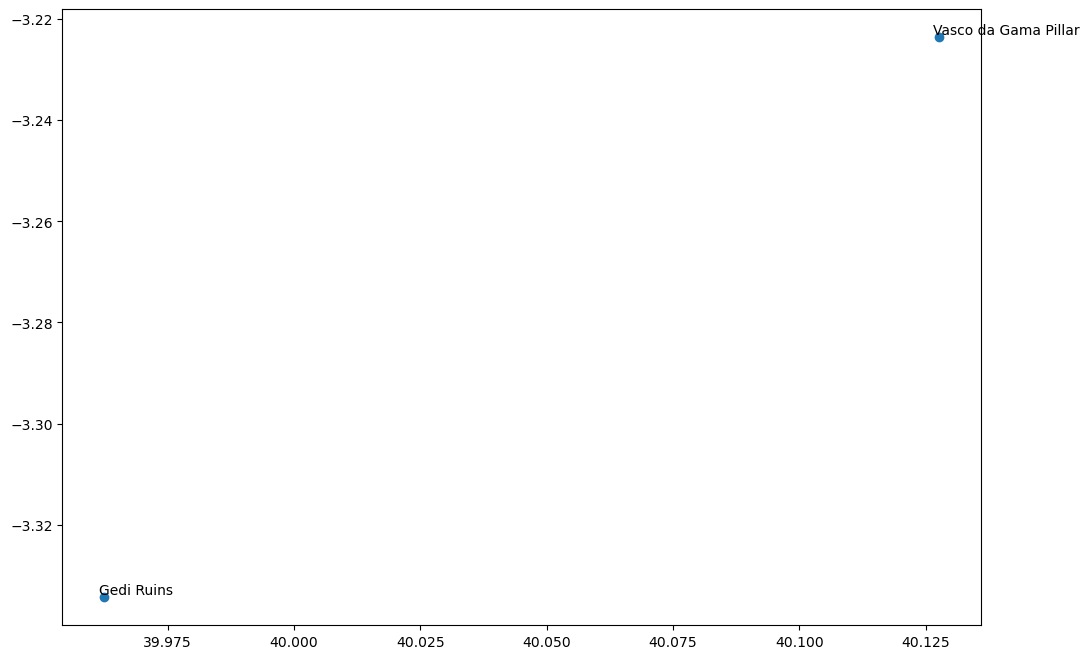

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
coast_points_map = coast_points_gpd.plot(ax=ax)

for name, lon, lat in zip(coast_points_gpd.Names, coast_points_gpd.Longitude, coast_points_gpd.Latitude):
    coast_points_map.annotate(name, xy=(lon, lat), xytext=(-4, 2), textcoords='offset points')

Now its time to measure the distance between our two points of interest. Can we, the tourist, be able to visit the two places all in one day? It's for python to find out.

In [21]:
# Measure line distance between the two points of Vasco da Gama Pillar and Gedi ruins
coast_points_crs = coast_points_gpd.to_crs("EPSG:32737")# Convert to local datum
coast_points_crs.crs

<Derived Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We have converted the dataframe from the WGS84 format to the local datum EPSG:32737 which is in metres. There are many tools to calculate distance between two points in Python. The `geopy` package is one of them, but it does not need the geodataframe to be converted to local datum format. However, we have done that because it is best practice to use a local datum for distance calculation, rather than a global datum whose measurement values are in degrees.

In [22]:
from geopy import distance
point1 = (40.127670, -3.223630)  # coordinates for Vasco Da Gama Pillar
point2 = (39.962392, -3.334307)  # coordinates for Gedi Ruins

print(distance.distance(point1, point2).km)

20.639578744143794


The two points, along a straight line from each other, are 20km apart. Note the word "straight line" because we did not follow a particular route, which could be longer or shorter. To calculate the true distance via a path, say a road, we would need a line geometry of the road. This is possible, but beyond the scope of this article.

You might also be curious as to why we hardcoded the coordinates rather than extract them from the geodataframe using a method such as `iloc` or `loc`. Truth of the matter is, we tried all we could, but Python kept throwing back several errors, something to do with `strings not being float values`. Therefore, we resulted to hardcording the coordinates although this is redundancy at its peak.

Time for the icing on the cake. Where are these points situated on real ground? If we will use a web map as background layer, expect for things at the ground to be different. We shall use `contextily` package which does a beautiful job of putting spatial objects in their geographic context.

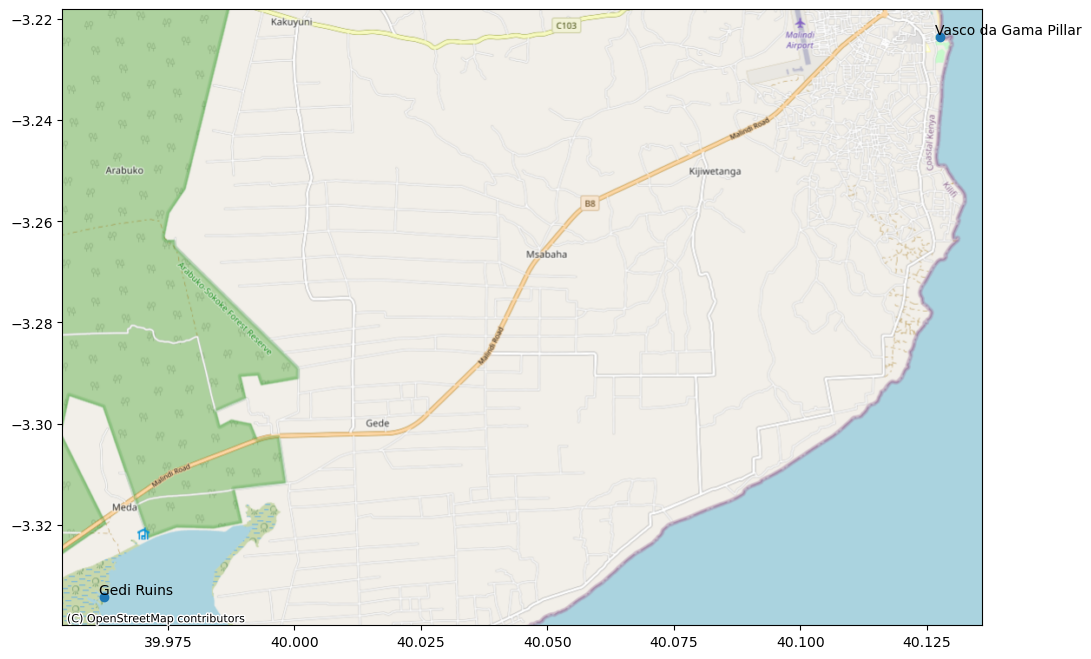

In [23]:
import contextily as cx

fig, ax = plt.subplots(figsize=(12, 8))
coast_points_map = coast_points_gpd.plot(ax=ax)

for name, lon, lat in zip(coast_points_gpd.Names, coast_points_gpd.Longitude, coast_points_gpd.Latitude):
    coast_points_map.annotate(name, xy=(lon, lat), xytext=(-4, 2), textcoords='offset points')
    
cx.add_basemap(ax, crs=coast_points_gpd.crs, source=cx.providers.OpenStreetMap.Mapnik)
plt.savefig("E:/documents/gis800_articles/jupyter/simple_gis/coastmap.png", dpi=400, orientation='landscape') # Saving it to a directory

In [24]:
# Conclusion